# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:

strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.


In [1]:
import numpy as np
from scipy.optimize import differential_evolution #Импорт библиотеки находит глобальный минимум многомерной функции.

In [2]:
def ackley(x): #Задаем функцию ackley от x
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)] #Задаем список данных

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Генерируем словарь зав-ти кол-ва итераций от значения множителя в популяции
it = {}
for pop in [2, 4, 8, 16,32,64, 128]:
    result = differential_evolution(ackley, bounds, seed=42, popsize=pop)
    it[pop] = result.nit
print(it)

{2: 7, 4: 39, 8: 97, 16: 102, 32: 102, 64: 97, 128: 98}


In [5]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Text(0, 0.5, 'Кол-во итераций')

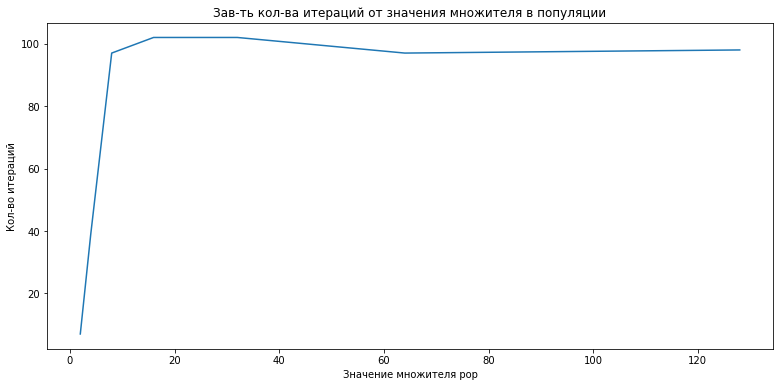

In [6]:
# Отображаем зав-ти кол-ва итераций от значения множителя в популяции на графике
a = pd.DataFrame(list(it.items()),
                   columns=['Pop', 'Interation_count'])
plt.plot(a.Pop, a.Interation_count)
plt.title('Зав-ть кол-ва итераций от значения множителя в популяции')
plt.xlabel('Значение множителя pop')
plt.ylabel('Кол-во итераций')

Из графика мы видим, что значение множителя от 8 практически не влияет на количество итераций, зависимость очень похожа на логарифмическую

In [7]:
# Генерируем словарь зав-ти кол-ва итераций от  типа DE
it = {}
for strat in ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']:
    result = differential_evolution(ackley, bounds, seed=42, strategy=strat)
    it[strat] = int(result.nit)

In [8]:
b = pd.DataFrame(list(it.items()),
                   columns=['Strategy', 'Interation_count'])

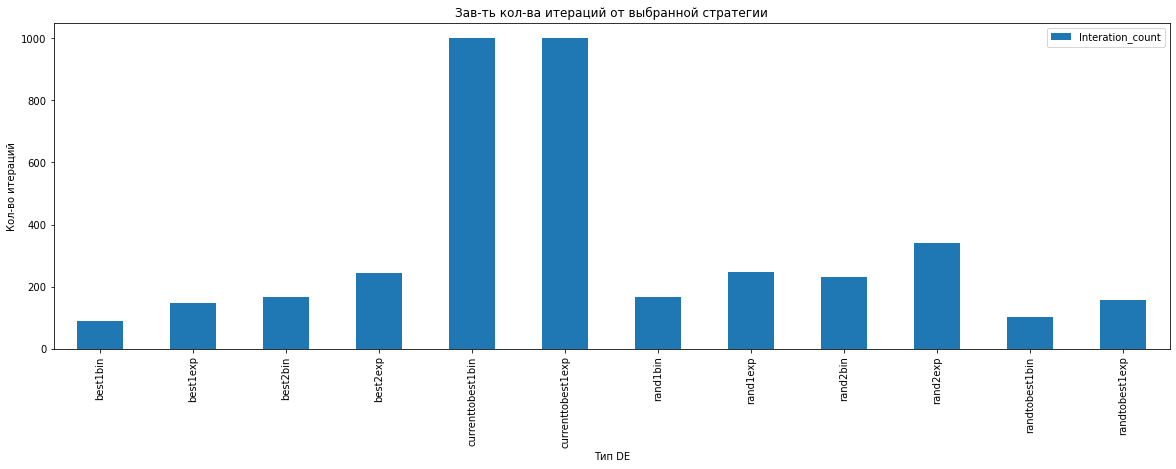

In [9]:
# Отображаем зав-ти кол-ва итераций от типа DE на графике
rcParams['figure.figsize'] = 20,6
c = b.groupby('Strategy').sum()
c.plot(kind = 'bar',
       title = 'Зав-ть кол-ва итераций от выбранной стратегии',
       xlabel = 'Тип DE',
       ylabel = 'Кол-во итераций')

Минимальное значение итераций наблюдается при использовании best1bin, максимальное - при currenttobest1exp и currenttobest1bin

In [10]:
# Генерируем словарь зав-ти кол-ва итераций от tol
it = {}
for tol_ in [-2,-1,-0.5,-0.1,0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]:
    result = differential_evolution(ackley, bounds, seed=42, tol=tol_)
    it[tol_] = int(result.nit)

In [11]:
d = pd.DataFrame(list(it.items()),
                   columns=['Tol', 'Interation_count'])

Text(0, 0.5, 'Кол-во итераций')

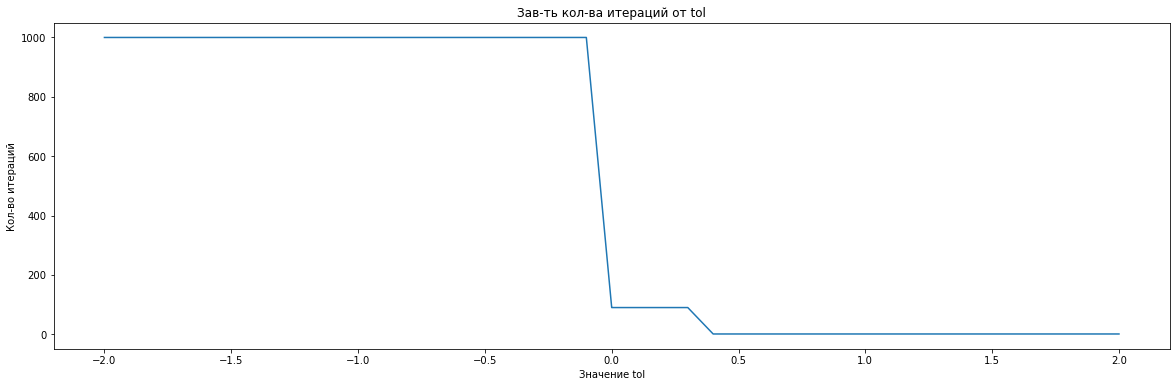

In [12]:
# Отображаем зав-ти кол-ва итераций от tol
rcParams['figure.figsize'] = 20,6
plt.plot(d.Tol, d.Interation_count)
plt.title('Зав-ть кол-ва итераций от tol')
plt.xlabel('Значение tol')
plt.ylabel('Кол-во итераций')

In [13]:
# Генерируем словарь зав-ти кол-ва итераций от константы мутации
it = {}
for mut in [0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.5,1.9]:
    result = differential_evolution(ackley, bounds, seed=42, mutation=mut)
    it[mut] = int(result.nit)

In [14]:
f = pd.DataFrame(list(it.items()),
                   columns=['mutation', 'Interation_count'])

Text(0, 0.5, 'Кол-во итераций')

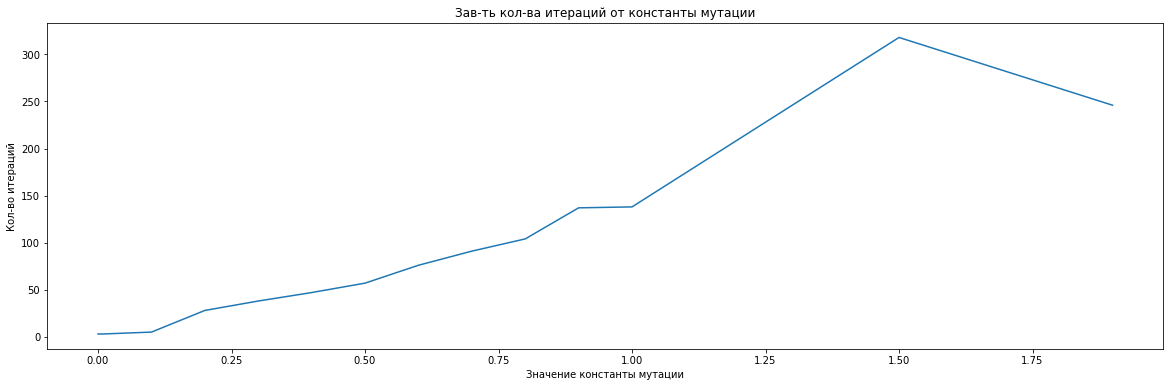

In [15]:
# Отображаем зав-ти кол-ва итераций от константы мутации
rcParams['figure.figsize'] = 20,6
plt.plot(f.mutation, f.Interation_count)
plt.title('Зав-ть кол-ва итераций от константы мутации')
plt.xlabel('Значение константы мутации')
plt.ylabel('Кол-во итераций')

С ростом значения коэффициента мутации растет и кол-во итераций, увеличение коэффициента мутации увеличивает радиус поиска, но замедляет его сходимость

In [16]:
# Генерируем словарь зав-ти кол-ва итераций от константы кроссовера
it = {}
for recomb in [0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    result = differential_evolution(ackley, bounds, seed=42, recombination=recomb)
    it[recomb] = int(result.nit)

In [17]:
g = pd.DataFrame(list(it.items()),
                   columns=['recombination', 'Interation_count'])

Text(0, 0.5, 'Кол-во итераций')

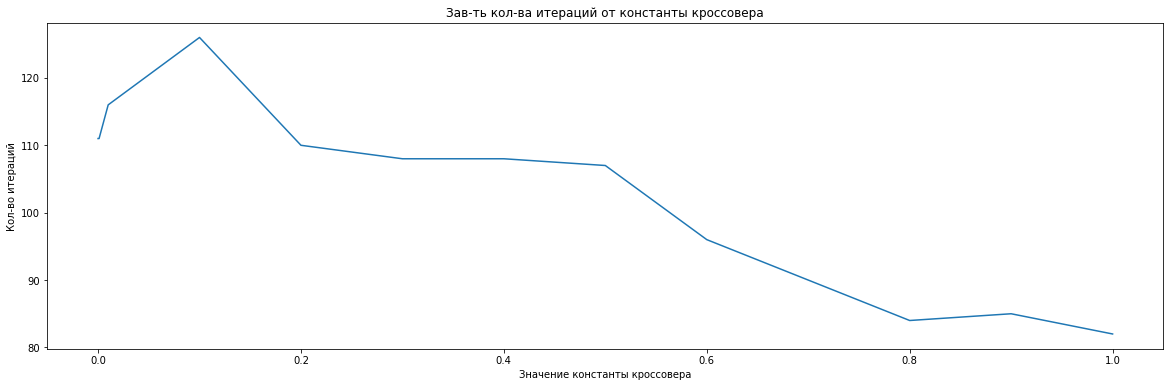

In [18]:
# Отображаем зав-ти кол-ва итераций от константы кроссовера
rcParams['figure.figsize'] = 20,6
plt.plot(g.recombination, g.Interation_count)
plt.title('Зав-ть кол-ва итераций от константы кроссовера')
plt.xlabel('Значение константы кроссовера')
plt.ylabel('Кол-во итераций')

Чем выше вероятность кроссовера, тем большее кол-во мутаций будет переходить в следующее поколение, и снизится кол-во итераций. Однако при этом повышается риск стабильности популяции 

In [19]:
# Генерируем словарь зав-ти кол-ва итераций от значения updating
it = {}
for upd in ['immediate','deferred']:
    result = differential_evolution(ackley, bounds, seed=42, updating=upd)
    it[upd] = int(result.nit)

In [20]:
h = pd.DataFrame(list(it.items()),
                   columns=['updating', 'Interation_count'])

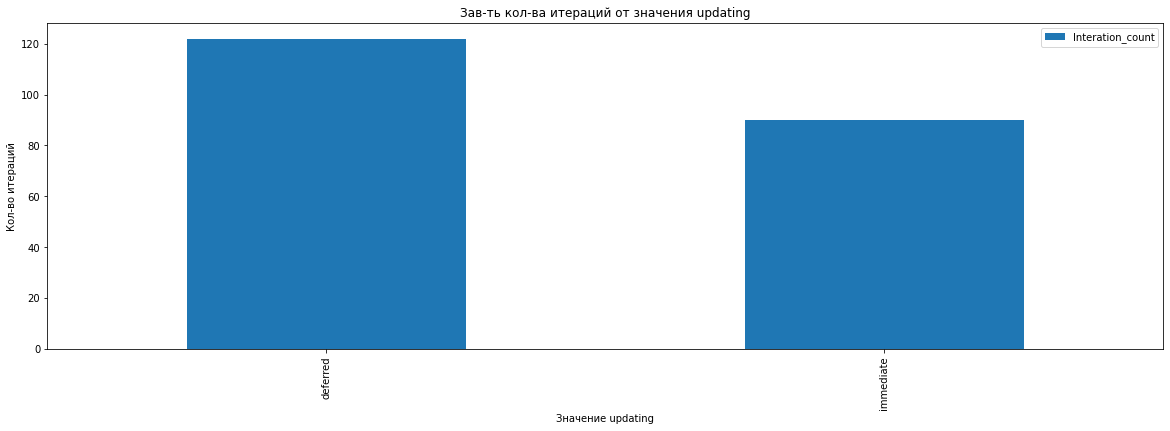

In [21]:
# Отображаем зав-ти кол-ва итераций от значения updating на графике
rcParams['figure.figsize'] = 20,6
k = h.groupby('updating').sum()
k.plot(kind = 'bar',
       title = 'Зав-ть кол-ва итераций от значения updating',
       xlabel = 'Значение updating',
       ylabel = 'Кол-во итераций')

Значение immediate указывает на то, что вектор наилучшего решения постоянно обновляется в предыдущем поколении, это приводит к более быстрой сходимости

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [22]:
# Генерируем словарь зав-ти кол-ва итераций от  типа DE и updating
it = {}
for strat in ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']:
    for upd in ['immediate','deferred']:
        result = differential_evolution(ackley, bounds, seed=42, strategy=strat, updating = upd)
        key = " ".join([strat, '_', upd])
        it[key] = int(result.nit)

In [23]:
l = pd.DataFrame(list(it.items()),
                   columns=['Parameters', 'Interation_count'])

In [24]:
#Разбиваем наш столбец Parameters на два Strategy и Updating
m = pd.DataFrame(l['Parameters'].str.split('_', expand=True).values,
             columns=['Strategy', 'Updating'])
final_df = pd.concat([l,m],axis=1) #Соединяем с исходным DF

In [25]:
# Находим значение параметров для минимального кол-ва итераций
final_df.iloc[final_df['Interation_count'].idxmin()]

Parameters          best1bin _ immediate
Interation_count                      90
Strategy                       best1bin 
Updating                       immediate
Name: 0, dtype: object

Минимальное значение итераций при использовании типа DE = best1bin и Updating = immediate